In [4]:
import numpy as np
import pandas as pd
import os
from scipy.stats import pearsonr,spearmanr
pd.set_option('display.max_rows', None)

In [5]:
ndvi=pd.read_csv(r"C:\Users\rishi\ml_projects\climate\2021_data\nlst_scaled\August_NLST.csv")
n02=pd.read_csv(r"C:\Users\rishi\ml_projects\climate\2021_data\O3\August_O3.csv")
ntl=pd.read_csv(r"C:\Users\rishi\ml_projects\climate\2018_data\NTL\August_NTL.csv")

In [6]:
ntl

,Unnamed: 0,78.036735138125,78.102088894375,78.16744265062499,78.232796406875,78.29815016312502,78.363503919375,78.428857675625,78.494211431875,78.559565188125,78.624918944375,78.69027270062499,78.755626456875,78.82098021312501,78.886333969375,78.951687725625,79.017041481875
0,17.885359,0.224752,0.395724,0.494732,0.494069,0.465599,0.292358,0.640708,0.558455,0.000000,0.031681,0.000000,0.059094,0.054908,0.000000,0.000000,0.000000
1,17.853064,0.178554,0.706252,0.560119,0.156466,0.327662,0.082181,1.016857,1.307273,0.009422,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008208
2,17.820768,0.089683,1.021002,0.588512,0.633260,0.577581,0.117747,0.706055,1.494606,0.356206,0.007541,0.181851,0.001433,0.000000,0.000000,0.002180,0.070456
3,17.788473,0.072861,0.558180,0.975345,0.765667,0.597272,0.000000,0.000000,0.083938,0.036868,0.000000,0.012169,0.003343,0.023638,0.000000,0.000000,0.000000
4,17.756178,0.493239,0.641525,1.288978,0.852291,0.710228,0.002729,0.084763,0.000000,0.016825,0.000000,0.085112,0.000000,0.000000,0.000000,0.000000,0.000000
5,17.723882,0.593619,0.218579,0.435205,1.107702,0.769264,0.421398,0.010485,0.000000,0.000000,0.052610,0.000000,0.000000,0.000000,0.000000,0.000000,0.114265
6,17.691587,0.202163,0.035822,0.000488,0.173276,0.955668,1.119887,0.021739,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125072
7,17.659291,0.455740,0.043173,0.471607,0.187556,1.273887,1.486454,0.339187,0.000000,0.000000,0.000000,0.047275,0.000000,0.024014,0.145580,0.000000,0.296751
8,17.626996,1.150789,0.429278,0.051822,0.320350,0.648030,1.058616,0.225737,0.000000,0.000000,0.163297,0.377587,0.000000,0.092176,0.282567,0.120692,0.672445
9,17.594700,1.141942,0.056535,0.762480,0.772377,1.415258,3.277696,2.430853,2.272086,0.395370,1.532803,0.581047,0.166168,0.539884,0.603189,1.500191,0.809228


In [7]:
n02

,Unnamed: 0,78.036735138125,78.102088894375,78.16744265062499,78.232796406875,78.29815016312502,78.363503919375,78.428857675625,78.494211431875,78.559565188125,78.624918944375,78.69027270062499,78.755626456875,78.82098021312501,78.886333969375,78.951687725625,79.017041481875
0,17.885359,0.124162,0.124367,0.124164,0.124190,0.124114,0.124308,0.123992,0.124091,0.123873,0.124090,0.124001,0.123854,0.124143,0.124092,0.123976,0.124168
1,17.853064,0.124110,0.124338,0.124137,0.124041,0.124105,0.123877,0.124277,0.123826,0.124036,0.124031,0.123958,0.123876,0.124022,0.124040,0.123880,0.123890
2,17.820768,0.123992,0.124323,0.124075,0.123823,0.124086,0.124065,0.124276,0.123981,0.124193,0.123695,0.124044,0.124101,0.124103,0.124019,0.123983,0.124017
3,17.788473,0.124034,0.124186,0.124028,0.123865,0.124128,0.124132,0.123954,0.124044,0.123892,0.123754,0.123936,0.123974,0.124062,0.123810,0.124226,0.124150
4,17.756178,0.123994,0.124095,0.124274,0.124052,0.124078,0.124130,0.124061,0.123692,0.124198,0.124026,0.123843,0.123810,0.124195,0.124058,0.124213,0.124457
5,17.723882,0.124257,0.123986,0.124170,0.123970,0.124192,0.124061,0.124000,0.123836,0.124078,0.124162,0.124022,0.123966,0.124332,0.124248,0.124414,0.124621
6,17.691587,0.123967,0.124040,0.123997,0.123855,0.124167,0.123937,0.123939,0.124396,0.124077,0.124070,0.123967,0.124184,0.124196,0.124297,0.124289,0.124531
7,17.659291,0.123796,0.124093,0.123894,0.124072,0.124103,0.123975,0.124025,0.124367,0.124271,0.124041,0.124027,0.124171,0.124118,0.124412,0.124508,0.124518
8,17.626996,0.123997,0.124023,0.124135,0.123968,0.124112,0.123893,0.123996,0.124092,0.124333,0.124222,0.124156,0.124054,0.124237,0.124386,0.124421,0.124550
9,17.594700,0.124017,0.123905,0.123986,0.123756,0.124061,0.123791,0.123929,0.124545,0.124276,0.124298,0.124271,0.124019,0.124063,0.124351,0.124330,0.124485


In [8]:
print(n02.columns)

Index(['Unnamed: 0', '78.036735138125', '78.102088894375', '78.16744265062499',
       '78.232796406875', '78.29815016312502', '78.363503919375',
       '78.428857675625', '78.494211431875', '78.559565188125',
       '78.624918944375', '78.69027270062499', '78.755626456875',
       '78.82098021312501', '78.886333969375', '78.951687725625',
       '79.017041481875'],
      dtype='object')


In [9]:
n02=n02.drop('Unnamed: 0',axis=1)
ndvi=ndvi.drop('Unnamed: 0',axis=1)

In [10]:
n02_np=n02.to_numpy()
n02_np[0]
ndvi_np=ndvi.to_numpy()
ndvi_np.shape

n02_np=[e for ele in n02_np for e in ele]
ndvi_np=[e for ele in ndvi_np for e in ele]

print(len(n02_np))
print(len(ndvi_np))
print("spearman :",spearmanr(n02_np,ndvi_np))

480
480
spearman : SignificanceResult(statistic=0.42840768700188836, pvalue=7.577413366319741e-23)


In [11]:
exclude_vals=[]
total_count=-1
for i in range(2018, 2024):
    dir_path = fr"C:\Users\rishi\ml_projects\climate\{i}_data\NTL"
    filenames = os.listdir(dir_path)

    month_mapping = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }

    # Sort the filenames based on the month extracted from the filename
    sorted_filenames = sorted(filenames, key=lambda x: month_mapping[x.split('_')[0]])
    for filename in sorted_filenames:
        total_count+=1
        filepath = os.path.join(dir_path, filename)
        df = pd.read_csv(filepath, index_col=0)
        count=0
        for _, row in df.iterrows():
            count += (row == 0).sum()
        if(count>=df.shape[0]*df.shape[1]/10):
            exclude_vals.append(total_count)
            #print(print(f"year: {i} , month :{filename}, {total_count}"))
total_count=-6
for i in range(2018, 2024):
    dir_path = fr"C:\Users\rishi\ml_projects\climate\{i}_data\nlst_scaled"
    filenames = os.listdir(dir_path)

    month_mapping = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }

    # Sort the filenames based on the month extracted from the filename
    sorted_filenames = sorted(filenames, key=lambda x: month_mapping[x.split('_')[0]])
    for filename in sorted_filenames:
        total_count+=1
        filepath = os.path.join(dir_path, filename)
        df = pd.read_csv(filepath, index_col=0)
        count=0
        for _, row in df.iterrows():
            count += (row == 0).sum()
        if(count>=df.shape[0]*df.shape[1]/10):
            exclude_vals.append(total_count)
            #print(print(f"year: {i} , month :{filename}, {total_count}"))
exclude_vals=list(set(exclude_vals))
exclude_vals.sort()
exclude_vals

[1, 2, 13, 15, 25, 26, 39, 49, 61, 63]

In [12]:
df = pd.DataFrame(columns=['CO_NLST', 'NO2_NLST', 'O3_NLST', 'SO2_NLST', 'HCHO_NLST', 
                           'CO_NDVI', 'NO2_NDVI', 'O3_NDVI', 'SO2_NDVI', 'HCHO_NDVI',
                           'CO_NTL', 'NO2_NTL', 'O3_NTL', 'SO2_NTL', 'HCHO_NTL'])
months = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}
total_count=0
CO_all_vals = []
NO2_all_vals = []
O3_all_vals = []
SO2_all_vals = []
HCHO_all_vals = []
NLST_all_vals = []
NDVI_all_vals = []
NTL_all_vals = []
for year in range(2018,2024):

    for month in range(1,13):
        if(year == 2018 and month in range(1,6)):
            continue
        total_count+=1
        if(total_count in exclude_vals):
            continue
        CO_df = pd.read_csv(fr"C:\Users\rishi\ml_projects\climate\{year}_data\CO\{months[month]}_CO.csv")
        CO_df.drop("Unnamed: 0", axis=1, inplace=True)
        CO_vals = [val for sublist in CO_df.to_numpy() for val in sublist]
        CO_all_vals.append(CO_vals)
        # Read and process NO2 data
        NO2_df = pd.read_csv(fr"C:\Users\rishi\ml_projects\climate\{year}_data\NO2\{months[month]}_NO2.csv")
        NO2_df.drop("Unnamed: 0", axis=1, inplace=True)
        NO2_df.interpolate(method='linear',inplace=True)
        NO2_vals = [val for sublist in NO2_df.to_numpy() for val in sublist]
        NO2_all_vals.append(NO2_vals)
        # Read and process O3 data
        O3_df = pd.read_csv(fr"C:\Users\rishi\ml_projects\climate\{year}_data\O3\{months[month]}_O3.csv")
        O3_df.drop("Unnamed: 0", axis=1, inplace=True)
        O3_vals = [val for sublist in O3_df.to_numpy() for val in sublist]
        O3_all_vals.append(O3_vals)
        # Read and process SO2 data
        SO2_df = pd.read_csv(fr"C:\Users\rishi\ml_projects\climate\{year}_data\SO2\{months[month]}_SO2.csv")
        SO2_df.drop("Unnamed: 0", axis=1, inplace=True)
        SO2_vals = [val for sublist in SO2_df.to_numpy() for val in sublist]
        SO2_all_vals.append(SO2_vals)
        # Read and process HCHO data
        HCHO_df = pd.read_csv(fr"C:\Users\rishi\ml_projects\climate\{year}_data\HCHO\{months[month]}_HCHO.csv")
        HCHO_df.drop("Unnamed: 0", axis=1, inplace=True)
        HCHO_vals = [val for sublist in HCHO_df.to_numpy() for val in sublist]
        HCHO_all_vals.append(HCHO_vals)
        # Read and process NLST data
        NLST_df = pd.read_csv(fr"C:\Users\rishi\ml_projects\climate\{year}_data\nlst_scaled\{months[month]}_NLST.csv")
        NLST_df.drop("Unnamed: 0", axis=1, inplace=True)
        NLST_vals = [val for sublist in NLST_df.to_numpy() for val in sublist]
        NLST_all_vals.append(NLST_vals)
        # Read and process NDVI data
        NDVI_df = pd.read_csv(fr"C:\Users\rishi\ml_projects\climate\{year}_data\ndvi_scaled\{months[month]}_NDVI.csv")
        NDVI_df.drop("Unnamed: 0", axis=1, inplace=True)
        NDVI_vals = [val for sublist in NDVI_df.to_numpy() for val in sublist]
        NDVI_all_vals.append(NDVI_vals)

        NTL_df = pd.read_csv(fr"C:\Users\rishi\ml_projects\climate\{year}_data\NTL\{months[month]}_NTL.csv")
        NTL_df.drop("Unnamed: 0", axis=1, inplace=True)
        NTL_vals = [val for sublist in NTL_df.to_numpy() for val in sublist]
        NTL_all_vals.append(NTL_vals)
        
        CO_corr_nlst, CO_p_nlst = spearmanr(CO_vals, NLST_vals)
        NO2_corr_nlst, NO2_p_nlst = spearmanr(NO2_vals, NLST_vals)
        O3_corr_nlst, O3_p_nlst = spearmanr(O3_vals, NLST_vals)
        SO2_corr_nlst, SO2_p_nlst = spearmanr(SO2_vals, NLST_vals)
        HCHO_corr_nlst, HCHO_p_nlst = spearmanr(HCHO_vals, NLST_vals)

        # Spearman correlations for each pollutant with NDVI
        CO_corr_ndvi, CO_p_ndvi = spearmanr(CO_vals, NDVI_vals)
        NO2_corr_ndvi, NO2_p_ndvi = spearmanr(NO2_vals, NDVI_vals)
        O3_corr_ndvi, O3_p_ndvi = spearmanr(O3_vals, NDVI_vals)
        SO2_corr_ndvi, SO2_p_ndvi = spearmanr(SO2_vals, NDVI_vals)
        HCHO_corr_ndvi, HCHO_p_ndvi = spearmanr(HCHO_vals, NDVI_vals)

        CO_corr_ntl, CO_p_ntl = spearmanr(CO_vals, NTL_vals)
        NO2_corr_ntl, NO2_p_ntl = spearmanr(NO2_vals, NTL_vals)
        O3_corr_ntl, O3_p_ntl = spearmanr(O3_vals, NTL_vals)
        SO2_corr_ntl, SO2_p_ntl = spearmanr(SO2_vals, NTL_vals)
        HCHO_corr_ntl, HCHO_p_ntl = spearmanr(HCHO_vals, NTL_vals)

        row = [CO_corr_nlst, NO2_corr_nlst, O3_corr_nlst, SO2_corr_nlst, HCHO_corr_nlst,
               CO_corr_ndvi, NO2_corr_ndvi, O3_corr_ndvi, SO2_corr_ndvi, HCHO_corr_ndvi,
               CO_corr_ntl, NO2_corr_ntl, O3_corr_ntl, SO2_corr_ntl, HCHO_corr_ntl]

        df.loc[f"{month}-{year}"]=row
        

C:\Users\rishi\AppData\Local\Temp\ipykernel_21992\2894311144.py:89: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  CO_corr_ntl, CO_p_ntl = spearmanr(CO_vals, NTL_vals)
C:\Users\rishi\AppData\Local\Temp\ipykernel_21992\2894311144.py:90: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  NO2_corr_ntl, NO2_p_ntl = spearmanr(NO2_vals, NTL_vals)
C:\Users\rishi\AppData\Local\Temp\ipykernel_21992\2894311144.py:91: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  O3_corr_ntl, O3_p_ntl = spearmanr(O3_vals, NTL_vals)
C:\Users\rishi\AppData\Local\Temp\ipykernel_21992\2894311144.py:92: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  SO2_corr_ntl, SO2_p_ntl = spearmanr(SO2_vals, NTL_vals)
C:\Users\rishi\AppData\Local\Temp\ipykernel_21992\2894311144.py:93: ConstantInputWarning: An input array is constant; the corr

In [13]:
mean_row = df.mean()

# Add the mean values as a new row to the DataFrame
df.loc['Mean'] = mean_row
df.shape

(58, 15)

In [14]:
df

,CO_NLST,NO2_NLST,O3_NLST,SO2_NLST,HCHO_NLST,CO_NDVI,NO2_NDVI,O3_NDVI,SO2_NDVI,HCHO_NDVI,CO_NTL,NO2_NTL,O3_NTL,SO2_NTL,HCHO_NTL
8-2018,-0.195238,-0.029709,0.157896,0.168654,-0.036076,0.253241,0.096536,0.242226,0.031865,0.047492,-0.100148,0.276729,-0.075447,0.156953,-0.112391
9-2018,0.491096,0.370281,0.295173,-0.136359,0.241686,0.068101,-0.243207,0.019490,0.069179,-0.185260,-0.035439,0.410553,-0.071072,-0.061223,0.196706
10-2018,0.352011,-0.107262,0.277824,-0.008720,0.000697,-0.191874,-0.144774,-0.061962,-0.063804,-0.123015,0.072531,0.553951,-0.204149,0.028590,0.268374
11-2018,0.255846,-0.032614,0.292103,-0.111034,0.041028,-0.192980,-0.099361,-0.061280,0.086901,-0.074674,0.133089,0.691123,-0.223671,0.120393,0.261088
12-2018,0.453393,-0.028160,0.334022,-0.088940,0.076083,-0.255061,0.071032,-0.251186,0.047496,-0.039554,-0.043926,0.796270,-0.442827,-0.022985,0.272683
1-2019,0.179930,-0.068404,0.373102,0.114219,-0.003357,0.235213,0.266974,-0.232574,0.056739,0.166590,0.153103,0.751283,-0.389355,-0.025222,0.266437
2-2019,0.355452,-0.024373,0.555724,-0.070608,-0.092339,0.254050,0.089174,-0.163064,-0.015348,0.021084,0.185413,0.765203,-0.191288,-0.032290,0.515459
3-2019,0.124373,0.165800,0.054682,0.032360,0.070794,0.361542,0.127160,0.151268,-0.012093,0.263213,0.299380,0.766852,-0.266650,-0.072483,0.392462
4-2019,0.413145,0.202809,0.391229,0.047789,0.152122,0.232743,0.095158,-0.032783,0.092169,0.180783,0.282939,0.847506,-0.319297,-0.006549,0.373397
5-2019,0.605187,0.385205,0.430722,0.155930,0.230336,0.212480,0.259651,0.005454,0.090456,0.047881,-0.063035,0.611590,-0.276721,-0.040452,0.231486


In [15]:
# df.to_csv("pollution_correlation_with_ntl.csv")

In [16]:
print(np.shape(CO_all_vals))
CO_all_vals = [ele for sublist in CO_all_vals for ele in sublist]
NO2_all_vals = [ele for sublist in NO2_all_vals for ele in sublist]
O3_all_vals = [ele for sublist in O3_all_vals for ele in sublist]
SO2_all_vals = [ele for sublist in SO2_all_vals for ele in sublist]
HCHO_all_vals = [ele for sublist in HCHO_all_vals for ele in sublist]
NLST_all_vals = [ele for sublist in NLST_all_vals for ele in sublist]
NDVI_all_vals = [ele for sublist in NDVI_all_vals for ele in sublist]
NTL_all_vals = [ele for sublist in NTL_all_vals for ele in sublist]
np.shape(CO_corr_ndvi)

(57, 480)


()

In [18]:
CO_corr_nlst, CO_p_nlst = spearmanr(CO_all_vals, NLST_all_vals)
NO2_corr_nlst, NO2_p_nlst = spearmanr(NO2_all_vals, NLST_all_vals)
O3_corr_nlst, O3_p_nlst = spearmanr(O3_all_vals, NLST_all_vals)
SO2_corr_nlst, SO2_p_nlst = spearmanr(SO2_all_vals, NLST_all_vals)
HCHO_corr_nlst, HCHO_p_nlst = spearmanr(HCHO_all_vals, NLST_all_vals)

print("Spearman correlations with NLST:")
print(f"CO: Correlation = {CO_corr_nlst}")
print(f"NO2: Correlation = {NO2_corr_nlst}")
print(f"O3: Correlation = {O3_corr_nlst}")
print(f"SO2: Correlation = {SO2_corr_nlst}")
print(f"HCHO: Correlation = {HCHO_corr_nlst}")

Spearman correlations with NLST:
CO: Correlation = 0.3851662635960256
NO2: Correlation = 0.25507731807009604
O3: Correlation = 0.45729699236544263
SO2: Correlation = 0.010459420804047572
HCHO: Correlation = 0.47262758537738503


In [19]:
# Calculate Spearman correlations for each pollutant with NDVI
CO_corr_ndvi, CO_p_ndvi = spearmanr(CO_all_vals, NDVI_all_vals)
NO2_corr_ndvi, NO2_p_ndvi = spearmanr(NO2_all_vals, NDVI_all_vals)
O3_corr_ndvi, O3_p_ndvi = spearmanr(O3_all_vals, NDVI_all_vals)
SO2_corr_ndvi, SO2_p_ndvi = spearmanr(SO2_all_vals, NDVI_all_vals)
HCHO_corr_ndvi, HCHO_p_ndvi = spearmanr(HCHO_all_vals, NDVI_all_vals)

# Print the results for correlations with NDVI
print("\nSpearman correlations with NDVI:")
print(f"CO: Correlation = {CO_corr_ndvi}")
print(f"NO2: Correlation = {NO2_corr_ndvi}")
print(f"O3: Correlation = {O3_corr_ndvi}")
print(f"SO2: Correlation = {SO2_corr_ndvi}")
print(f"HCHO: Correlation = {HCHO_corr_ndvi}")



Spearman correlations with NDVI:
CO: Correlation = -0.5236469251718882
NO2: Correlation = -0.58069055507779
O3: Correlation = 0.11121196169962506
SO2: Correlation = -0.24900132255203264
HCHO: Correlation = -0.4674882776760097


In [20]:
# Calculate Spearman correlations for each pollutant with NTL
CO_corr_ntl, CO_p_ntl = spearmanr(CO_all_vals, NTL_all_vals)
NO2_corr_ntl, NO2_p_ntl = spearmanr(NO2_all_vals, NTL_all_vals)
O3_corr_ntl, O3_p_ntl = spearmanr(O3_all_vals, NTL_all_vals)
SO2_corr_ntl, SO2_p_ntl = spearmanr(SO2_all_vals, NTL_all_vals)
HCHO_corr_ntl, HCHO_p_ntl = spearmanr(HCHO_all_vals, NTL_all_vals)

# Print the results for correlations with NTL
print("\nSpearman correlations with NTL:")
print(f"CO: Correlation = {CO_corr_ntl}")
print(f"NO2: Correlation = {NO2_corr_ntl}")
print(f"O3: Correlation = {O3_corr_ntl}")
print(f"SO2: Correlation = {SO2_corr_ntl}")
print(f"HCHO: Correlation = {HCHO_corr_ntl}")



Spearman correlations with NTL:
CO: Correlation = 0.2719561835542578
NO2: Correlation = 0.5587849996889487
O3: Correlation = -0.06935724777694643
SO2: Correlation = 0.16326164395630346
HCHO: Correlation = 0.33798735620584475


In [21]:
columns = ['NLST', 'NTL', 'NDVI']
rows = ['CO', 'NO2', 'O3', 'SO2', 'HCHO']

# Create an empty DataFrame
correlation_df = pd.DataFrame(columns=columns)

# Populate the DataFrame with your correlation values
correlation_df.loc[0] = [CO_corr_nlst, CO_corr_ntl, CO_corr_ndvi]
correlation_df.loc[1] = [NO2_corr_nlst, NO2_corr_ntl, NO2_corr_ndvi]
correlation_df.loc[2] = [O3_corr_nlst, O3_corr_ntl, O3_corr_ndvi]
correlation_df.loc[3] = [SO2_corr_nlst, SO2_corr_ntl, SO2_corr_ndvi]
correlation_df.loc[4] = [HCHO_corr_nlst, HCHO_corr_ntl, HCHO_corr_ndvi]

# Display the DataFrame to confirm
print(correlation_df)




       NLST       NTL      NDVI
0  0.385166  0.271956 -0.523647
1  0.255077  0.558785 -0.580691
2  0.457297 -0.069357  0.111212
3  0.010459  0.163262 -0.249001
4  0.472628  0.337987 -0.467488


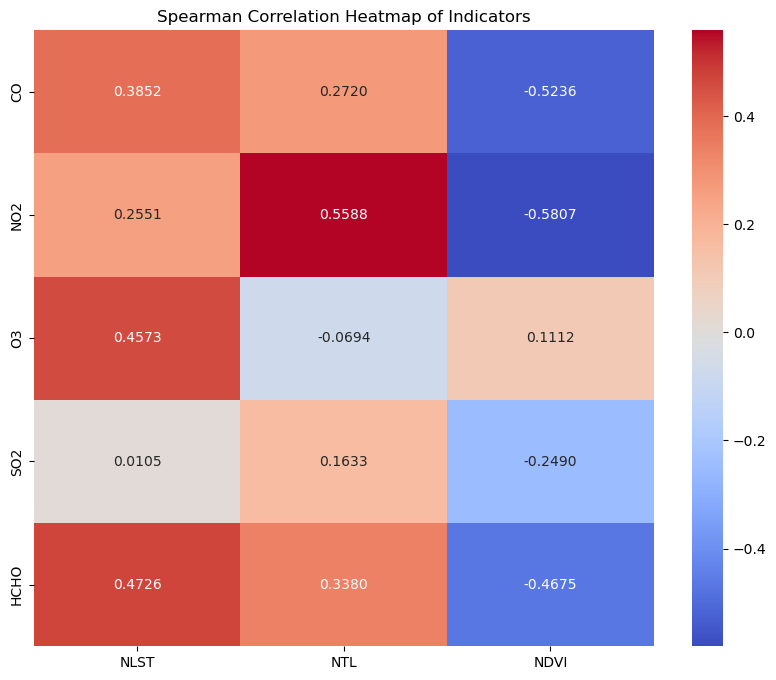

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'correlation_matrix' is a DataFrame or 2D array with your correlation values
# And 'x_labels' and 'y_labels' are lists of the indicator names for the x and y axes

plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_df, annot=True, cmap="coolwarm", xticklabels=columns, yticklabels=rows,fmt=".4f")

# Set the axis labels
plt.title('Spearman Correlation Heatmap of Indicators')

# Display the heatmap
plt.show()


          HCHO        O3       NO2        CO       SO2      NLST      NDVI  \
HCHO  1.000000  0.082644  0.562220  0.639161  0.261416  0.350708 -0.451105   
O3    0.082644  1.000000 -0.217510 -0.239566 -0.326076 -0.199751  0.177206   
NO2   0.562220 -0.217510  1.000000  0.506241  0.280816  0.274259 -0.516388   
CO    0.639161 -0.239566  0.506241  1.000000  0.435786  0.470615 -0.506770   
SO2   0.261416 -0.326076  0.280816  0.435786  1.000000  0.257022 -0.239510   
NLST  0.350708 -0.199751  0.274259  0.470615  0.257022  1.000000 -0.184581   
NDVI -0.451105  0.177206 -0.516388 -0.506770 -0.239510 -0.184581  1.000000   
NTL   0.208937 -0.046611  0.663464  0.123716  0.069153  0.106163 -0.250145   

           NTL  
HCHO  0.208937  
O3   -0.046611  
NO2   0.663464  
CO    0.123716  
SO2   0.069153  
NLST  0.106163  
NDVI -0.250145  
NTL   1.000000  


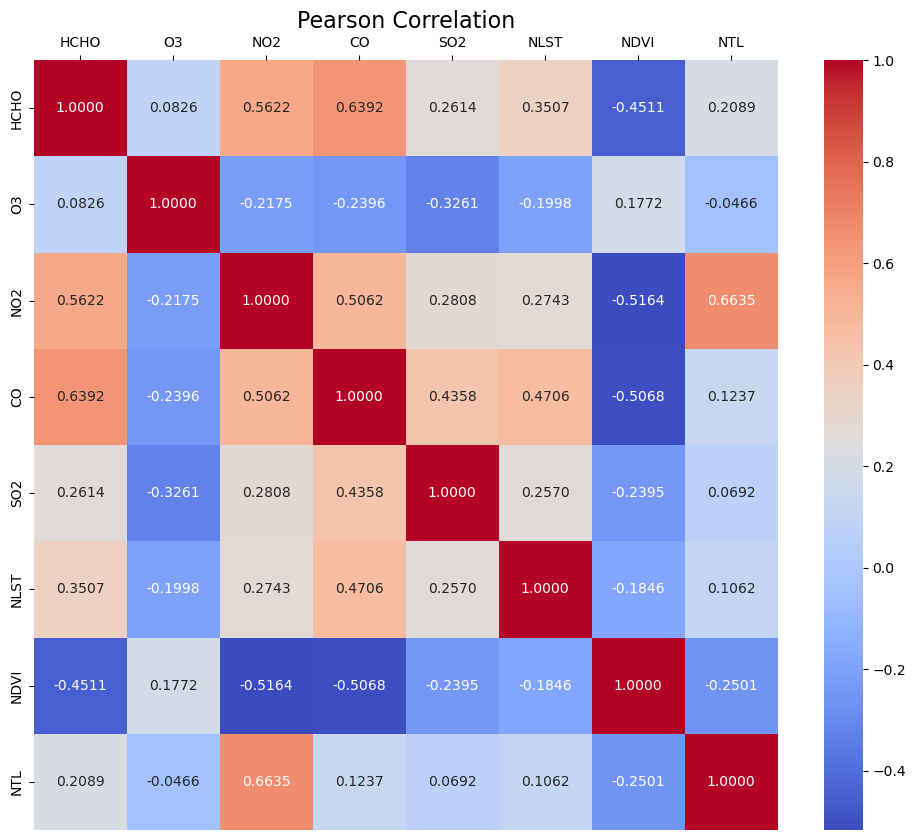

In [23]:
data = pd.DataFrame({
    'HCHO': HCHO_all_vals,
    'O3': O3_all_vals,
    'NO2': NO2_all_vals,
    'CO': CO_all_vals,
    'SO2': SO2_all_vals,
    'NLST': NLST_all_vals,
    'NDVI': NDVI_all_vals,
    'NTL' : NTL_all_vals
})

# Calculate the correlation matrix
correlation_matrix = data.corr(method='pearson')
cols=correlation_matrix.columns.tolist()
plt.figure(figsize=(12,10))
ax=sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", xticklabels=cols, yticklabels=cols,fmt=".4f")
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.title('Pearson Correlation',fontsize=16)
# Display the correlation matrix
print(correlation_matrix)

          HCHO        O3       NO2        CO       SO2      NLST      NDVI  \
HCHO  1.000000  0.085579  0.620021  0.644687  0.275578  0.472628 -0.467488   
O3    0.085579  1.000000 -0.225217 -0.180567 -0.325676  0.457297  0.111212   
NO2   0.620021 -0.225217  1.000000  0.605571  0.337547  0.255077 -0.580691   
CO    0.644687 -0.180567  0.605571  1.000000  0.427514  0.385166 -0.523647   
SO2   0.275578 -0.325676  0.337547  0.427514  1.000000  0.010459 -0.249001   
NLST  0.472628  0.457297  0.255077  0.385166  0.010459  1.000000 -0.298942   
NDVI -0.467488  0.111212 -0.580691 -0.523647 -0.249001 -0.298942  1.000000   
NTL   0.337987 -0.069357  0.558785  0.271956  0.163262  0.241753 -0.229679   

           NTL  
HCHO  0.337987  
O3   -0.069357  
NO2   0.558785  
CO    0.271956  
SO2   0.163262  
NLST  0.241753  
NDVI -0.229679  
NTL   1.000000  


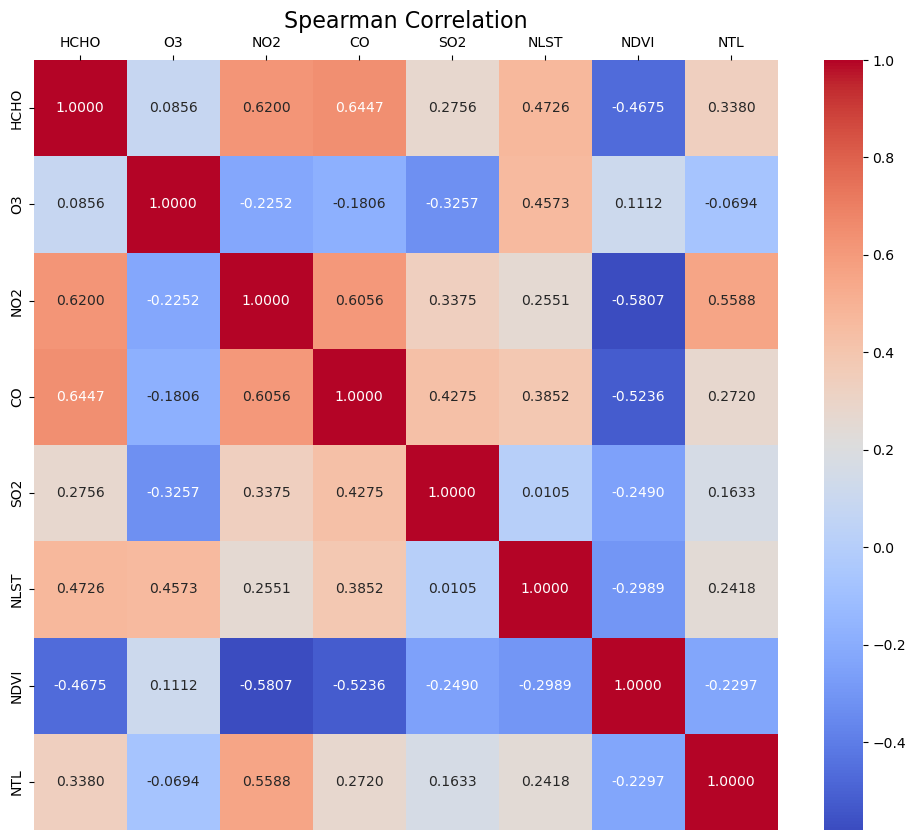

In [24]:
data = pd.DataFrame({
    'HCHO': HCHO_all_vals,
    'O3': O3_all_vals,
    'NO2': NO2_all_vals,
    'CO': CO_all_vals,
    'SO2': SO2_all_vals,
    'NLST': NLST_all_vals,
    'NDVI': NDVI_all_vals,
    'NTL' : NTL_all_vals
})

# Calculate the correlation matrix
correlation_matrix = data.corr(method='spearman')
cols=correlation_matrix.columns.tolist()
plt.figure(figsize=(12,10))
ax=sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", xticklabels=cols, yticklabels=cols,fmt=".4f")
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.title('Spearman Correlation',fontsize=16)
# Display the correlation matrix
print(correlation_matrix)